# **BigMart Sales Prediction**

-----------------------------
## **Context**
-----------------------------

In today’s modern world, huge shopping centers such as big malls and marts are recording data related to sales of items or products as an important step to predict the sales and get an idea about future demands that can help with inventory management. Understanding what role certain properties of an item play and how they affect their sales is imperative to any retail business

The Data Scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. Using this data, **BigMart is trying to understand the properties of products and stores which play a key role in increasing sales**.

-----------------------------
## **Objective**
-----------------------------

To build a predictive model that can find out the sales of each product at a particular store and then provide actionable recommendations to the BigMart sales team to understand the properties of products and stores which play a key role in increasing sales.

-----------------------------
## **Dataset**
-----------------------------

- Item_Identifier : Unique product ID

- Item_Weight : Weight of the product

- Item_Fat_Content : Whether the product is low fat or not

- Item_Visibility : The % of the total display area of all products in a store allocated to the particular product

- Item_Type : The category to which the product belongs

- Item_MRP : Maximum Retail Price (list price) of the product

- Outlet_Identifier : Unique store ID

- Outlet_Establishment_Year : The year in which the store was established

- Outlet_Size : The size of the store in terms of ground area covered

- Outlet_Location_Type : The type of city in which the store is located

- Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

- Item_Outlet_Sales : Sales of the product in the particular store. This is the outcome variable to be predicted.

We have two datasets - train (8523) and test (5681) data. The training dataset has both input and output variable(s). You will need to predict the sales for the test dataset.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [1]:
# Importing libraries for data manipulation
import numpy as np

import pandas as pd

# Importing libraries for data visualization
import seaborn as sns

import matplotlib.pyplot as plt

# Importing libraries for building linear regression model
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")
drive.mount('/content/drive')
import pandas as pd
import os
os.chdir("/content/drive/MyDrive/Data_Science_AI_ML/Foundations_of data_science/regression_and_prediction")


Mounted at /content/drive


In [2]:
# Loading both train and test datasets

train_df = pd.read_csv('Train.csv')

test_df = pd.read_csv('Test.csv')

In [3]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
test_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [5]:
train_df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train_df.shape, test_df.shape

((8523, 12), (5681, 11))

In [7]:
train_df=train_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [8]:
test_df=test_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [9]:
train_df.shape, test_df.shape

((8523, 10), (5681, 9))

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                4705 non-null   float64
 1   Item_Fat_Content           5681 non-null   object 
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   object 
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Establishment_Year  5681 non-null   int64  
 6   Outlet_Size                4075 non-null   object 
 7   Outlet_Location_Type       5681 non-null   object 
 8   Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 399.6+ KB


In [12]:
missing_percent = train_df.isnull().mean() * 100

missing_percent

,0
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000
Outlet_Type,0.000000
Item_Outlet_Sales,0.000000


In [13]:
train_df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

**Univariate Analysis : **

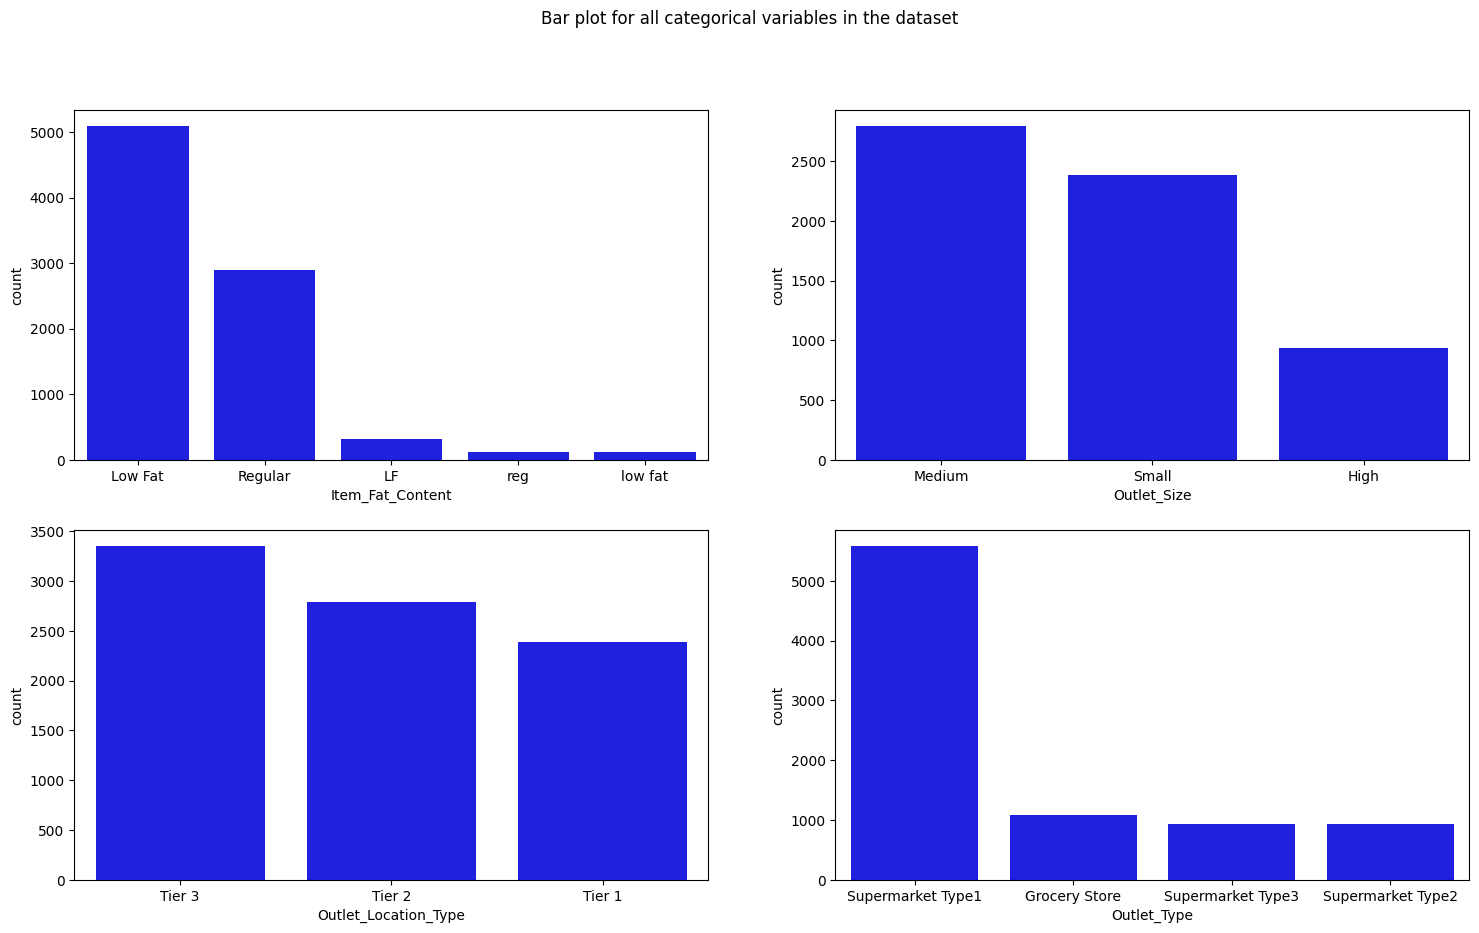

In [14]:
fig, axes = plt.subplots(2, 2, figsize = (18, 10))

fig.suptitle('Bar plot for all categorical variables in the dataset')

sns.countplot(ax = axes[0, 0], x = 'Item_Fat_Content', data = train_df, color = 'blue',
              order = train_df['Item_Fat_Content'].value_counts().index);

sns.countplot(ax = axes[0, 1], x = 'Outlet_Size', data = train_df, color = 'blue',
              order = train_df['Outlet_Size'].value_counts().index);

sns.countplot(ax = axes[1, 0], x = 'Outlet_Location_Type', data = train_df, color = 'blue',
              order = train_df['Outlet_Location_Type'].value_counts().index);

sns.countplot(ax = axes[1, 1], x = 'Outlet_Type', data = train_df, color = 'blue',
              order = train_df['Outlet_Type'].value_counts().index);

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Fruits and Vegetables'),
  Text(1, 0, 'Snack Foods'),
  Text(2, 0, 'Household'),
  Text(3, 0, 'Frozen Foods'),
  Text(4, 0, 'Dairy'),
  Text(5, 0, 'Canned'),
  Text(6, 0, 'Baking Goods'),
  Text(7, 0, 'Health and Hygiene'),
  Text(8, 0, 'Soft Drinks'),
  Text(9, 0, 'Meat'),
  Text(10, 0, 'Breads'),
  Text(11, 0, 'Hard Drinks'),
  Text(12, 0, 'Others'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Breakfast'),
  Text(15, 0, 'Seafood')])

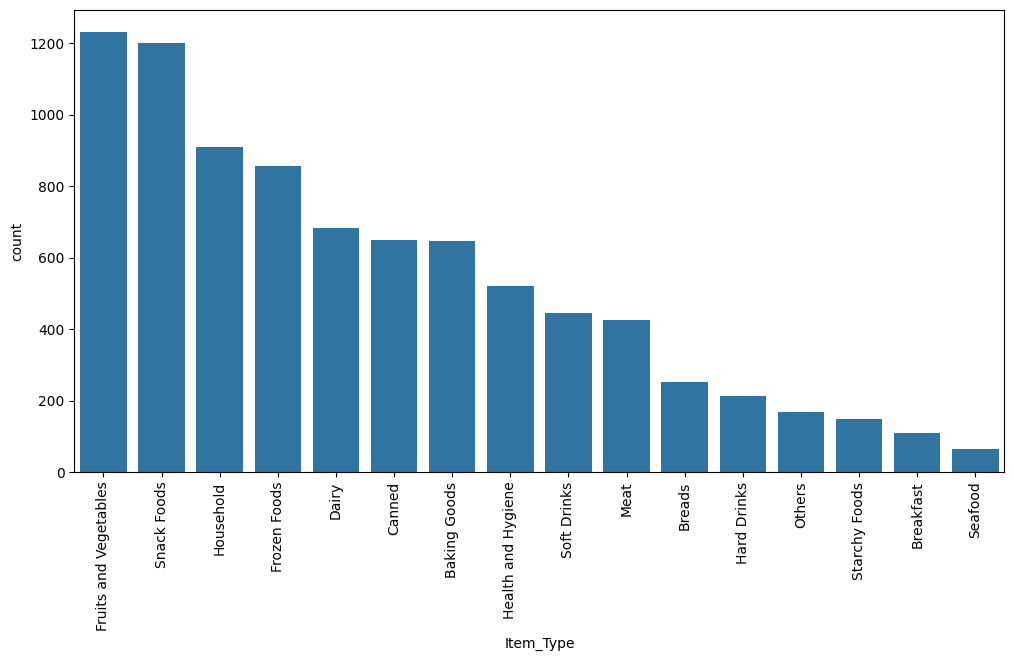

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Item_Type', data=train_df, order = train_df['Item_Type'].value_counts().index); plt.xticks(rotation=90)

In [16]:
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].apply( lambda x: 'Low Fat' if x.lower().strip() in ['lf', 'low fat'] else 'Regular' if x.lower().strip() in ['reg', 'regular'] else x )



In [17]:
train_df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [18]:
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].apply( lambda x: 'Low Fat' if x.lower().strip() in ['lf', 'low fat'] else 'Regular' if x.lower().strip() in ['reg', 'regular'] else x )


In [19]:
test_df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3668
Regular,2013


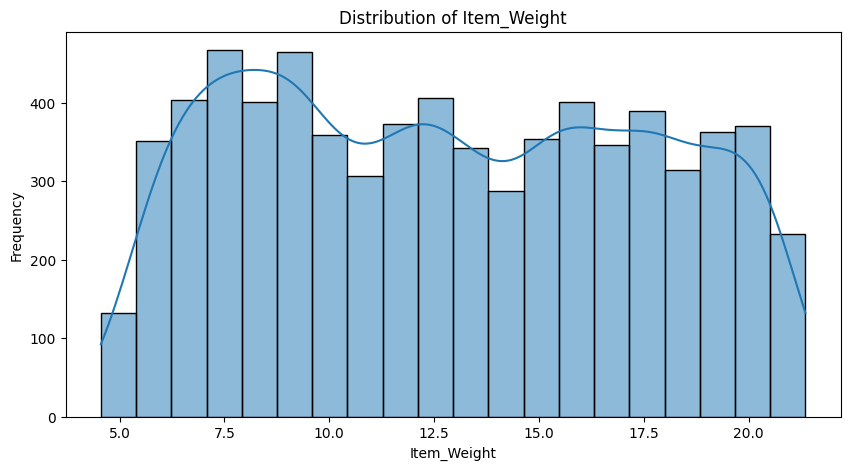

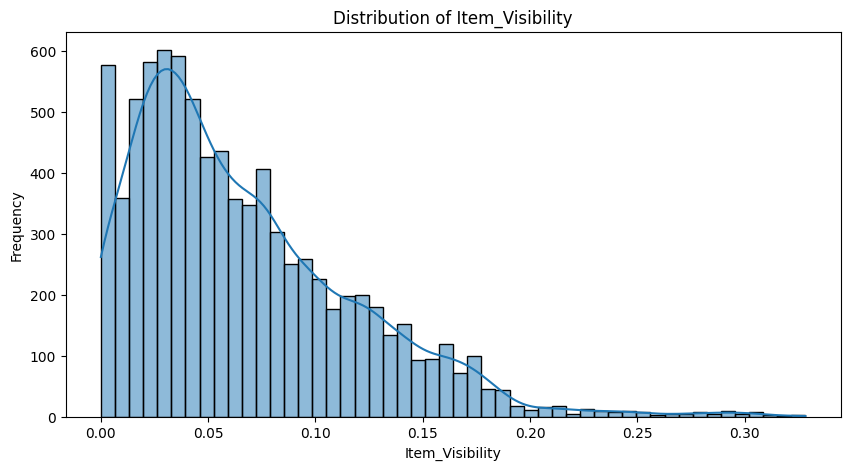

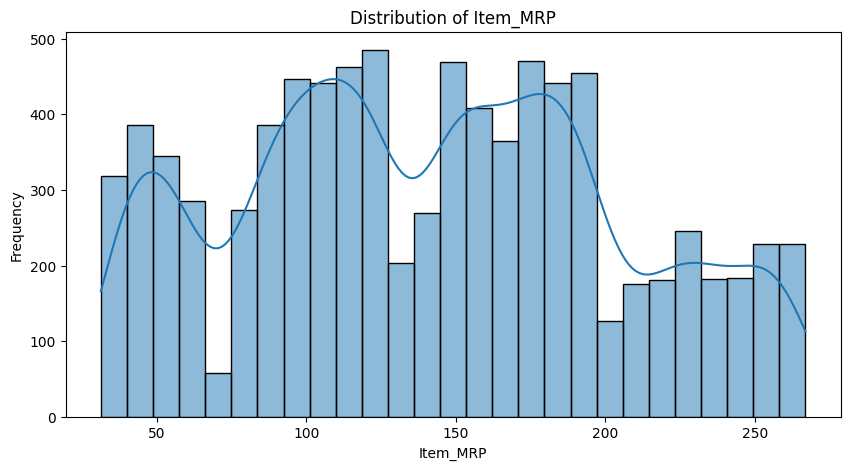

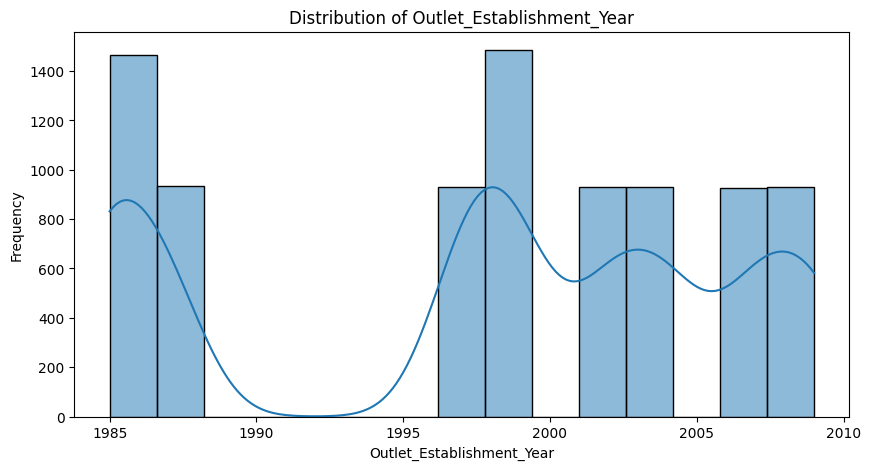

In [20]:
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
# Univariate Analysis for numerical columns
for col in numerical_cols:
  plt.figure(figsize=(10, 5))
  sns.histplot(train_df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

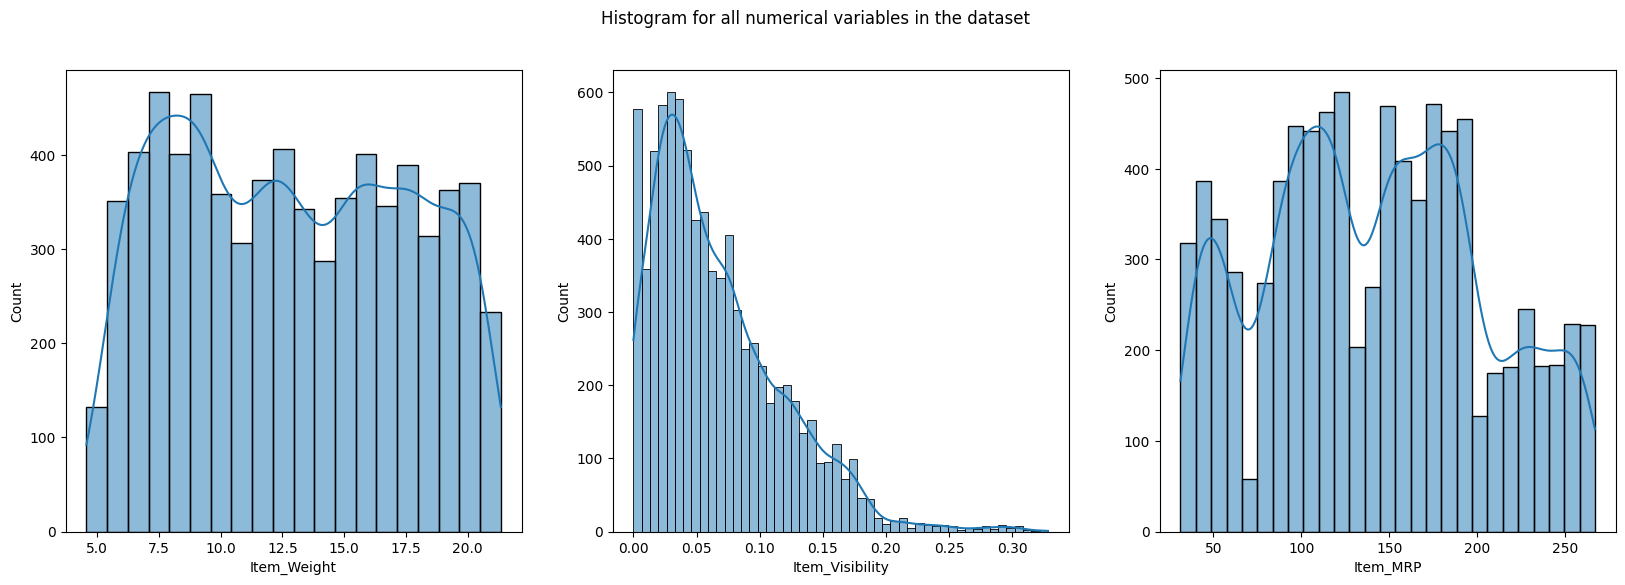

In [21]:
fig, axes = plt.subplots(1, 3, figsize = (20, 6))

fig.suptitle('Histogram for all numerical variables in the dataset')

sns.histplot(x = 'Item_Weight', data = train_df, kde = True, ax = axes[0]);

sns.histplot(x='Item_Visibility', data = train_df, kde = True, ax = axes[1]);

sns.histplot(x='Item_MRP', data = train_df, kde = True, ax = axes[2]);

**Bivariate Analysis :**

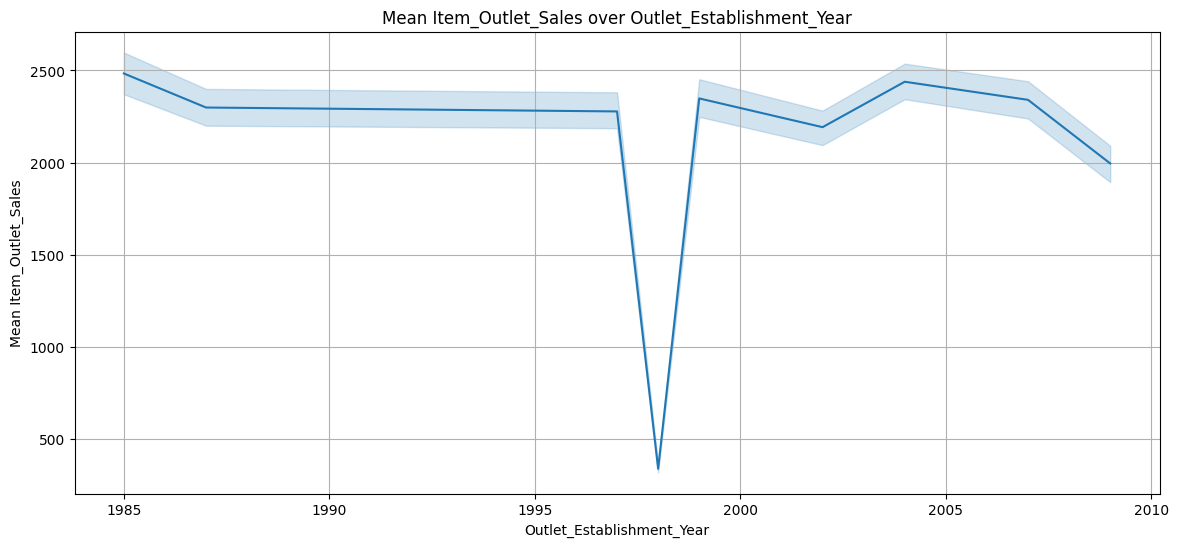

In [22]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=train_df, x='Outlet_Establishment_Year', y='Item_Outlet_Sales')
plt.title("Mean Item_Outlet_Sales over Outlet_Establishment_Year")
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Mean Item_Outlet_Sales')
plt.grid(True)
plt.show()

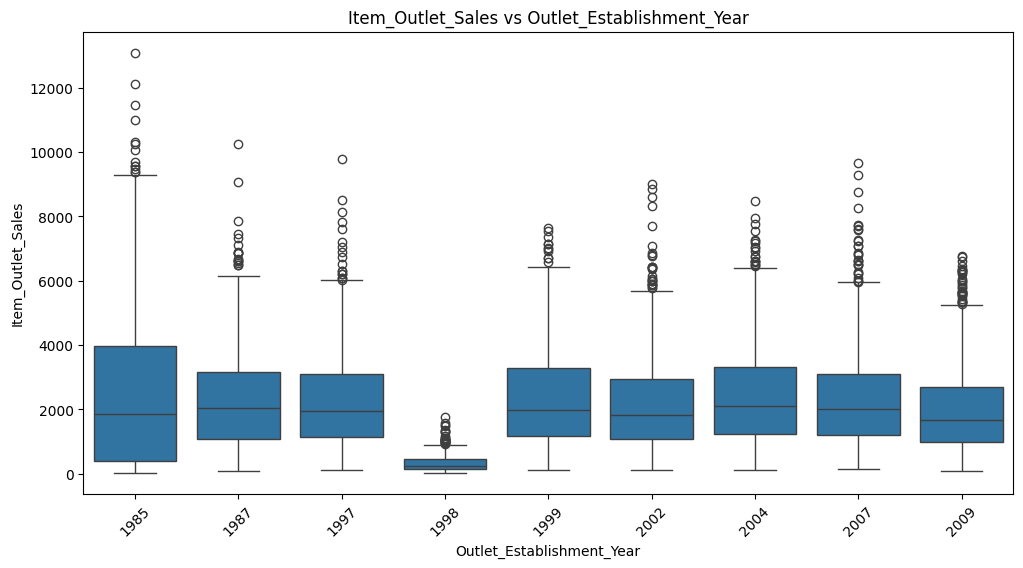

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=train_df)
plt.title('Item_Outlet_Sales vs Outlet_Establishment_Year')
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')
plt.xticks(rotation=45)
plt.show()

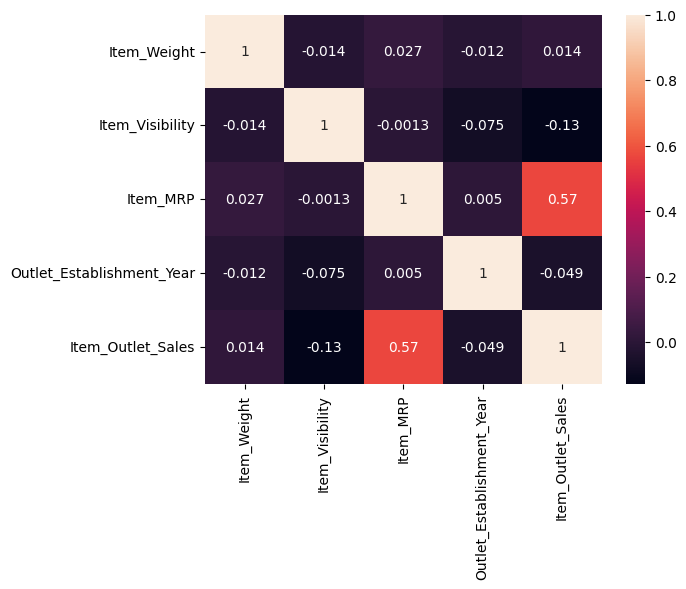

In [24]:
dataplot = sns.heatmap(train_df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']].corr(), annot=True)
plt.show()

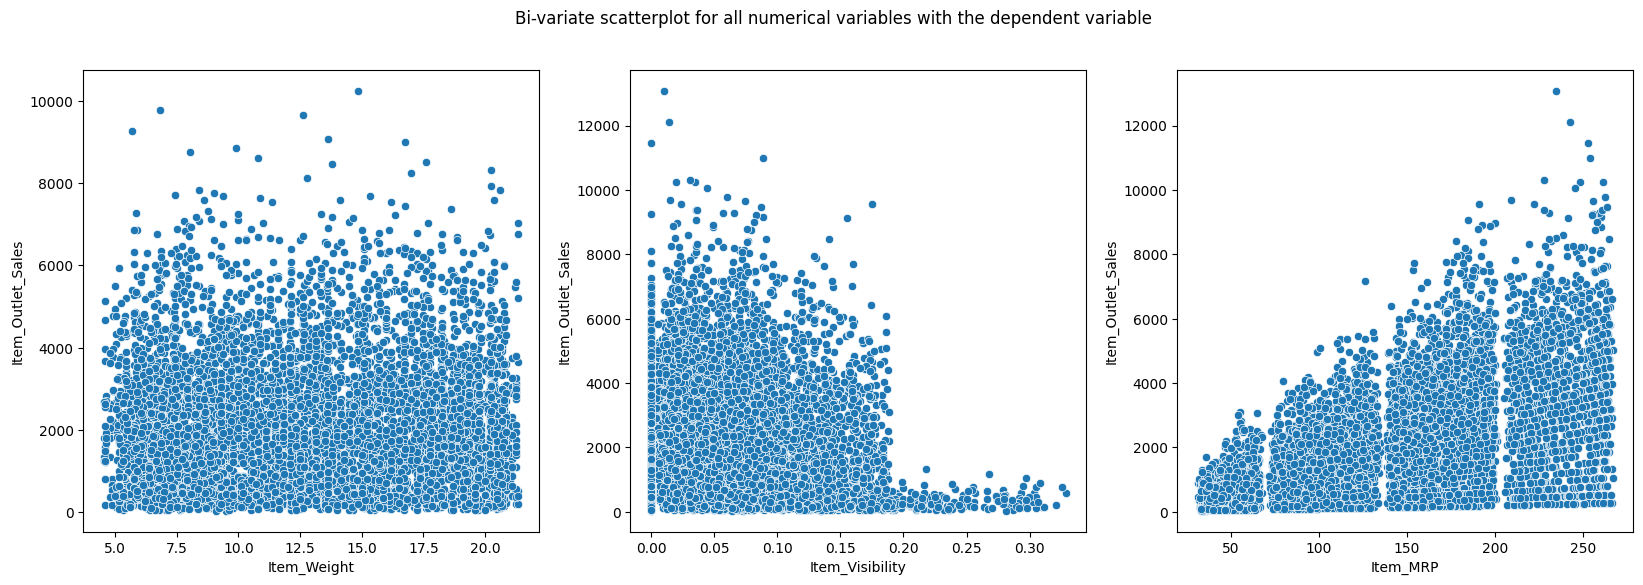

In [25]:
fig, axes = plt.subplots(1, 3, figsize = (20, 6))

fig.suptitle('Bi-variate scatterplot for all numerical variables with the dependent variable')

sns.scatterplot(x = 'Item_Weight', y = 'Item_Outlet_Sales', data = train_df, ax = axes[0]);

sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = train_df, ax = axes[1]);

sns.scatterplot(x = 'Item_MRP', y = 'Item_Outlet_Sales', data = train_df, ax = axes[2]);

**Missing Value Treatment:**

Here, we are imputing missing values for the variable **Item_Weight**. There are many ways to impute missing values, we can impute the missing values by its **mean**, **median**, and using advanced imputation algorithms like **knn**, etc. But, here we are trying to find out some relationship of the variable **Item_Weight** with other variables in the dataset to impute those missing values.

And also, after imputing the missing values for the variables, the overall distribution of the variable should not change significantly.

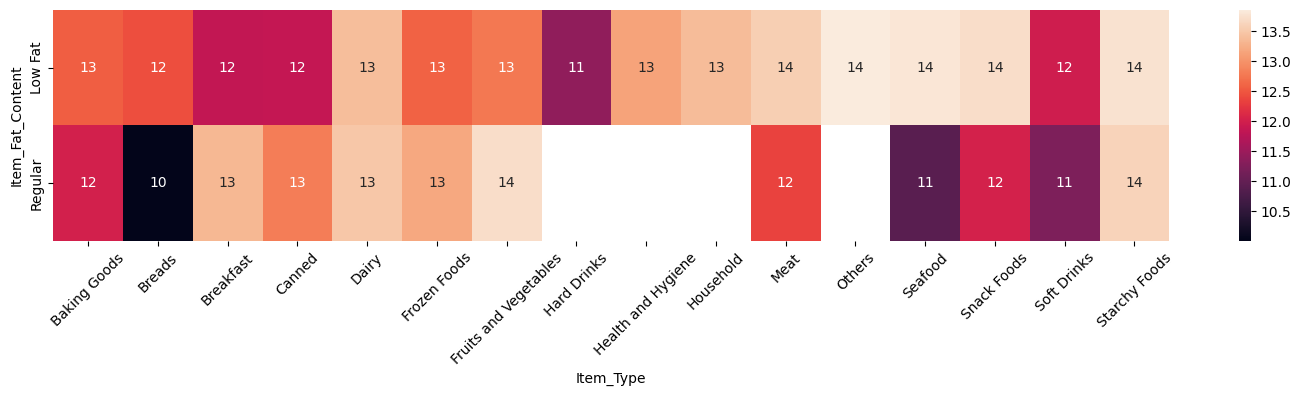

In [26]:
fig = plt.figure(figsize = (18, 3))

sns.heatmap(train_df.pivot_table(index = 'Item_Fat_Content', columns = 'Item_Type', values = 'Item_Weight'), annot = True);

plt.xticks(rotation = 45);

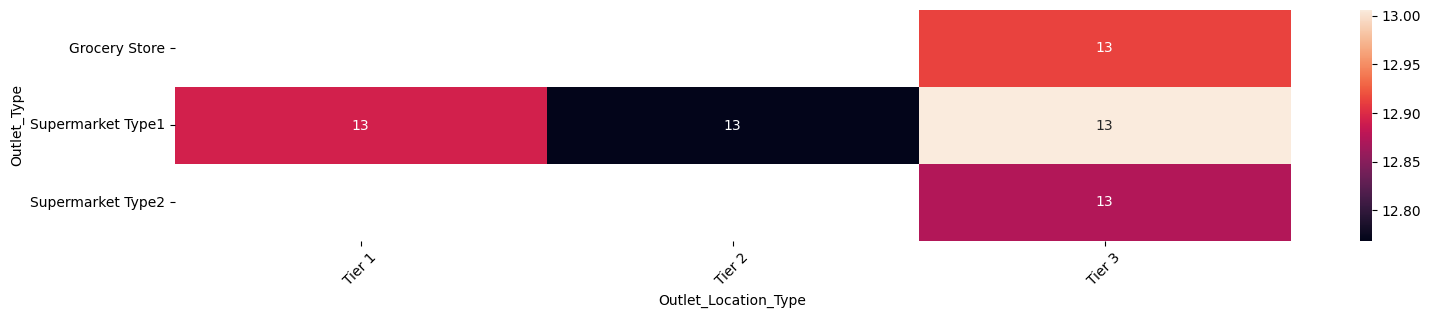

In [27]:
fig = plt.figure(figsize = (18, 3))

sns.heatmap(train_df.pivot_table(index = 'Outlet_Type', columns = 'Outlet_Location_Type', values = 'Item_Weight'), annot = True);

plt.xticks(rotation = 45);

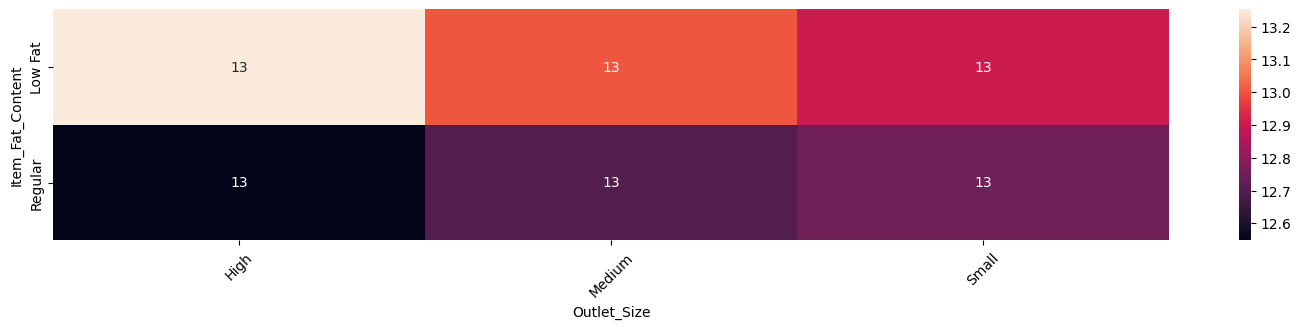

In [28]:
fig = plt.figure(figsize = (18, 3))

sns.heatmap(train_df.pivot_table(index = 'Item_Fat_Content', columns = 'Outlet_Size', values = 'Item_Weight'), annot = True);

plt.xticks(rotation = 45);

In [29]:
item_weight_indices_to_be_updated = train_df[train_df['Item_Weight'].isnull()].index

train_df.loc[item_weight_indices_to_be_updated, 'Item_Weight'] = np.random.uniform(10, 14,
                                                                                   len(item_weight_indices_to_be_updated))

In [30]:
item_weight_indices_to_be_updated = test_df[test_df['Item_Weight'].isnull()].index

test_df.loc[item_weight_indices_to_be_updated, 'Item_Weight'] = np.random.uniform(10, 14,
                                                                                   len(item_weight_indices_to_be_updated))

In [31]:
outlet_size_data = train_df[train_df['Outlet_Size'].notnull()]

outlet_size_missing_data = train_df[train_df['Outlet_Size'].isnull()]

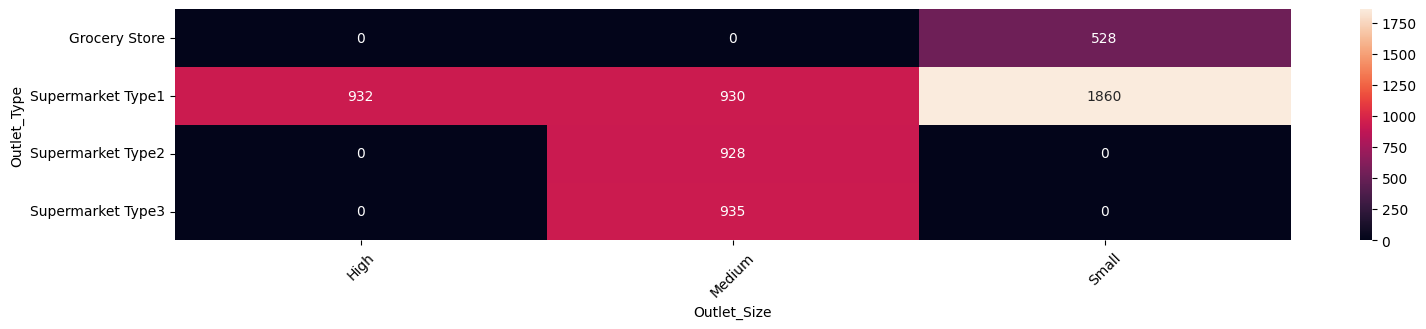

In [32]:
fig= plt.figure(figsize=(18, 3))

sns.heatmap(pd.crosstab(index = outlet_size_data['Outlet_Type'], columns = outlet_size_data['Outlet_Size']), annot = True, fmt = 'g')

plt.xticks(rotation=45);

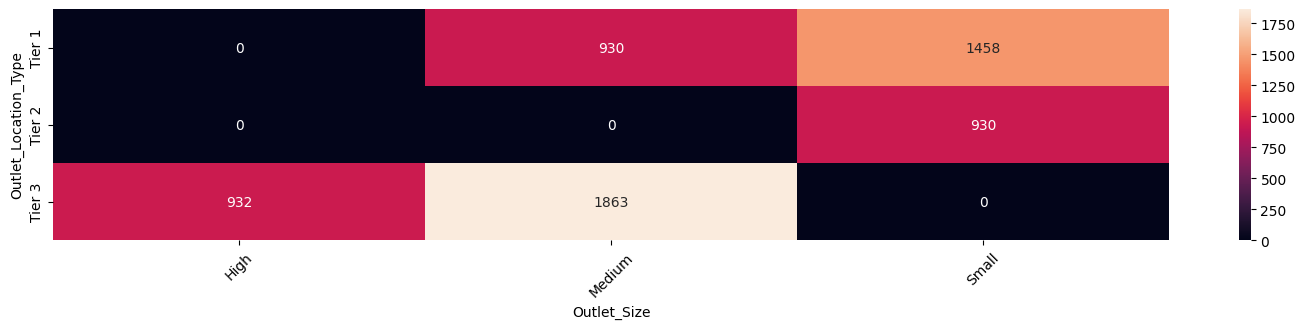

In [33]:
fig = plt.figure(figsize = (18, 3))

sns.heatmap(pd.crosstab(index = outlet_size_data['Outlet_Location_Type'], columns = outlet_size_data['Outlet_Size']), annot = True, fmt = 'g')

plt.xticks(rotation = 45);

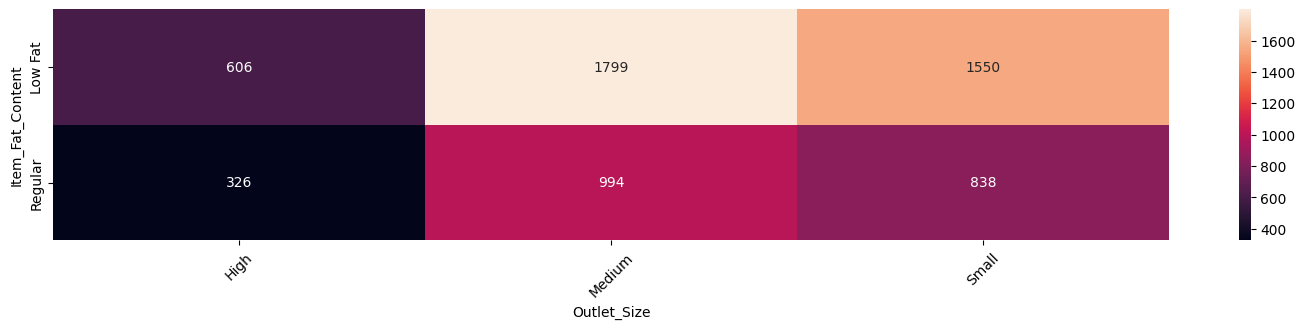

In [34]:
fig = plt.figure(figsize = (18, 3))

sns.heatmap(pd.crosstab(index = outlet_size_data['Item_Fat_Content'], columns = outlet_size_data['Outlet_Size']), annot = True, fmt = 'g')

plt.xticks(rotation = 45);

In [35]:
grocery_store_indices = train_df[train_df['Outlet_Size'].isnull()].query(" Outlet_Type == 'Grocery Store' ").index

tier_2_indices = train_df[train_df['Outlet_Size'].isnull()].query(" Outlet_Location_Type == 'Tier 2' ").index

In [36]:
train_df.loc[grocery_store_indices, 'Outlet_Size'] = 'Small'

train_df.loc[tier_2_indices, 'Outlet_Size'] = 'Small'

In [37]:
grocery_store_indices = test_df[test_df['Outlet_Size'].isnull()].query(" Outlet_Type == 'Grocery Store' ").index

tier_2_indices = test_df[test_df['Outlet_Size'].isnull()].query(" Outlet_Location_Type == 'Tier 2' ").index

In [38]:
test_df.loc[grocery_store_indices, 'Outlet_Size'] = 'Small'

test_df.loc[tier_2_indices, 'Outlet_Size'] = 'Small'

In [39]:
train_df.isnull().sum()

,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0
Item_Outlet_Sales,0


In [40]:
test_df.isnull().sum()

,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0


**Feature Engineering **

Now that we have completed the data understanding and data preparation step, before starting with the modeling task, we think that certain features are not present in the dataset, but we can create them using the existing columns, which can have the predictive power to predict the sales. This step of creating a new feature from the existing features in the dataset is known as **Feature Engineering**. So, we will start with a hypothesis - As the store gets older, the sales increase. Now, how do we define old? We know the establishment year and this data is collected in 2013, so the age can be found by subtracting the establishment year from 2013. This is what we are doing in the below code.

In [41]:
train_df['Outlet_Age'] = 2013 - train_df['Outlet_Establishment_Year']

test_df['Outlet_Age'] = 2013 - test_df['Outlet_Establishment_Year']

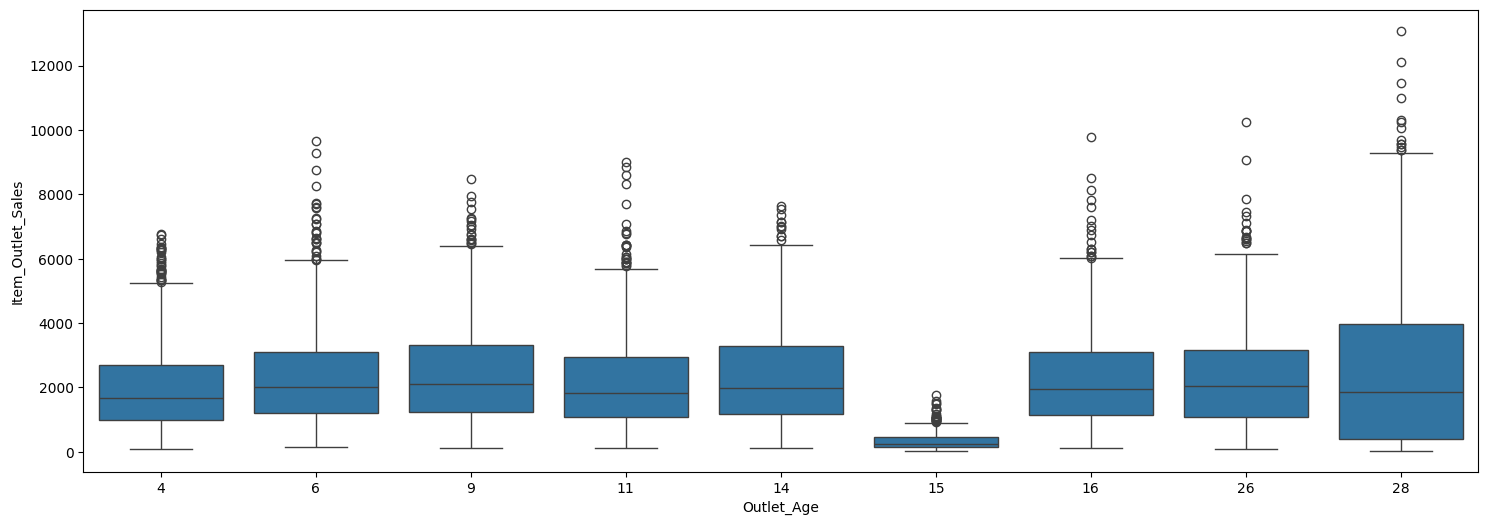

In [42]:
fig = plt.figure(figsize = (18, 6))

sns.boxplot(x = 'Outlet_Age', y = 'Item_Outlet_Sales', data = train_df);

**Observations:**
* The hypothesis that we had - **As the store gets older, the sales increase** does not seem to hold based on the above plot. Because of the different ages of stores, the sales have similar distribution approximately. But let's keep this variable as of now, and we will revisit this variable at the time of model building and we can remove this variable by observing its significance later on.

**Modelling**

In [43]:
train_df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Outlet_Age'],
      dtype='object')

In [44]:
train_df = train_df.drop([ 'Outlet_Establishment_Year',], axis = 1)

In [45]:
# Creating dummy variables for the categorical variables
train_features = pd.get_dummies(train_df , drop_first = True)

train_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,14,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,443.4228,4,True,False,False,False,False,...,False,True,False,True,False,False,True,False,True,False
2,17.50,0.016760,141.6180,2097.2700,14,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,732.3800,15,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
4,8.93,0.000000,53.8614,994.7052,26,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False


In [46]:
train_features.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Outlet_Age', 'Item_Fat_Content_Regular', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [47]:
from sklearn.model_selection import train_test_split

#np.random.seed(0) # not must to do
df_train, df_test = train_test_split(train_features, train_size = 0.8, test_size = 0.2, random_state = 100)

In [48]:
df_train.shape,df_test.shape

((6818, 28), (1705, 28))

In [49]:
x_train=df_train.drop(['Item_Outlet_Sales'],axis=1)
y_train=df_train['Item_Outlet_Sales']

In [50]:
x_test=df_test.drop(['Item_Outlet_Sales'],axis=1)
y_test=df_test['Item_Outlet_Sales']

In [51]:
x_train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [52]:
scaler = MinMaxScaler()

# Applying fit_transform on the training features data
train_features_scaled = scaler.fit_transform(x_train)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
train_features_scaled = pd.DataFrame(train_features_scaled, index = x_train.index, columns = x_train.columns)

train_features_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
747,0.830307,0.000000,0.478849,0.208333,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
367,0.276273,0.244467,0.328250,0.083333,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1735,0.562370,0.092749,0.488060,0.291667,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
6498,0.151831,0.139425,0.113706,0.916667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1740,0.538708,0.115633,0.785869,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [53]:
scaler = MinMaxScaler()

# Applying fit_transform on the training features data
test_features_scaled = scaler.fit_transform(x_test)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
test_features_scaled = pd.DataFrame(test_features_scaled, index = x_test.index, columns = x_test.columns)

test_features_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3454,0.961298,0.516662,0.646719,0.916667,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3386,0.571301,0.108010,0.955875,0.083333,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
235,0.391628,0.132688,0.686473,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7201,0.845192,0.159369,0.326417,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
7782,0.508782,0.134572,0.633147,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [54]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train) # training

LinearRegression()

In [55]:
#Let's see the summary of our linear model
print(lr_model.coef_)

[-5.43142444e-01 -2.12804857e+02  1.55806215e+01 -2.61532733e+01
  5.73122567e+01 -3.60724570e+01  9.73252188e+00  3.86903894e+00
 -3.87507044e+01 -4.14708413e+01 -8.78276065e-01 -2.73364781e+00
  7.04048011e+00 -4.36592196e+01 -2.33585789e+00  4.64325614e+01
  2.81191882e+02 -2.05271256e+01 -3.62708990e+01 -1.01688803e+01
 -6.00428146e+02 -6.54802358e+02 -1.33953407e+02 -3.53499964e+02
  1.57136852e+03  1.27183962e+03  3.62081806e+03]


In [56]:
x_train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [57]:
# this is for our understanding - not needed for LR model
import numpy as np
importance = np.array(lr_model.coef_)
importance = importance / sum(importance)
print(importance )

[-1.16301292e-04 -4.55671989e-02  3.33622686e-03 -5.60011376e-03
  1.22720836e-02 -7.72407571e-03  2.08399266e-03  8.28464489e-04
 -8.29755994e-03 -8.88001385e-03 -1.88062344e-04 -5.85346949e-04
  1.50755468e-03 -9.34860404e-03 -5.00169511e-04  9.94245052e-03
  6.02106861e-02 -4.39540539e-03 -7.76656744e-03 -2.17742866e-03
 -1.28567690e-01 -1.40210659e-01 -2.86829993e-02 -7.56937761e-02
  3.36471935e-01  2.72334803e-01  7.75313775e-01]


In [58]:
for z in range(len(list(x_train.columns))):
    print("The Importance coefficient for {} is {}".format(x_train.columns[z], importance[z]))

The Importance coefficient for Item_Weight is -0.00011630129191131313
The Importance coefficient for Item_Visibility is -0.04556719893300882
The Importance coefficient for Item_MRP is 0.003336226864329574
The Importance coefficient for Outlet_Age is -0.00560011376011314
The Importance coefficient for Item_Fat_Content_Regular is 0.01227208364233521
The Importance coefficient for Item_Type_Breads is -0.0077240757101938425
The Importance coefficient for Item_Type_Breakfast is 0.0020839926640451602
The Importance coefficient for Item_Type_Canned is 0.0008284644889295083
The Importance coefficient for Item_Type_Dairy is -0.008297559941685325
The Importance coefficient for Item_Type_Frozen Foods is -0.008880013849920996
The Importance coefficient for Item_Type_Fruits and Vegetables is -0.00018806234391163757
The Importance coefficient for Item_Type_Hard Drinks is -0.0005853469490975313
The Importance coefficient for Item_Type_Health and Hygiene is 0.0015075546788658517
The Importance coeffic

In [59]:
print(lr_model.intercept_)

-422.004869191353


In [60]:
y_train_pred = lr_model.predict(x_train)
residuals = (y_train_pred - y_train)

Text(0.5, 0, 'Errors')

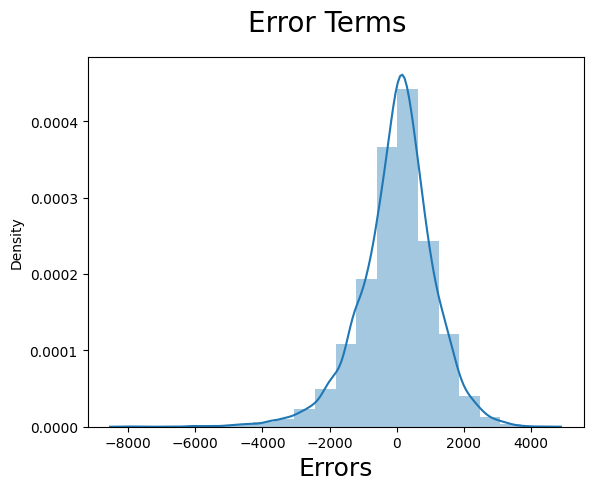

In [61]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residuals, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

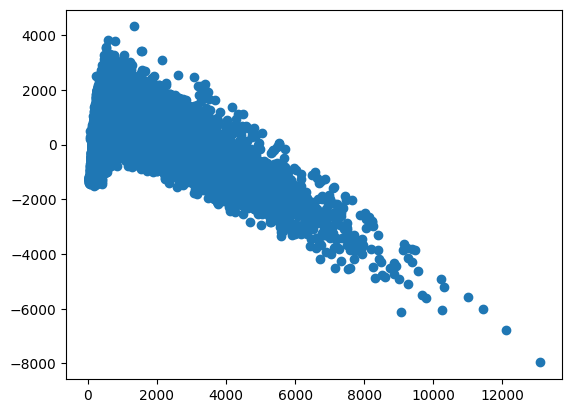

In [62]:
plt.scatter(y_train,residuals)
plt.show()
# Model is giving negative error in high house price range and postive error in low house price range
# Its estimating a bit higher prices for houses with lower prices and lower pricess for houses with higher prices
# We might need more data or the relatioship between input and ouput is not necessarily linear in all regions

# In the region where model is doing fine ( residual around 0) - we do have lot of data points

In [63]:
x_test.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [64]:
# Making predictions
y_test_pred = lr_model.predict(x_test)

In [65]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error
r2_score(y_test, y_test_pred)

0.5485566187080284

In [66]:
mean_absolute_percentage_error(y_test, y_test_pred)

1.05893882453666

Text(0, 0.5, 'y_test_pred')

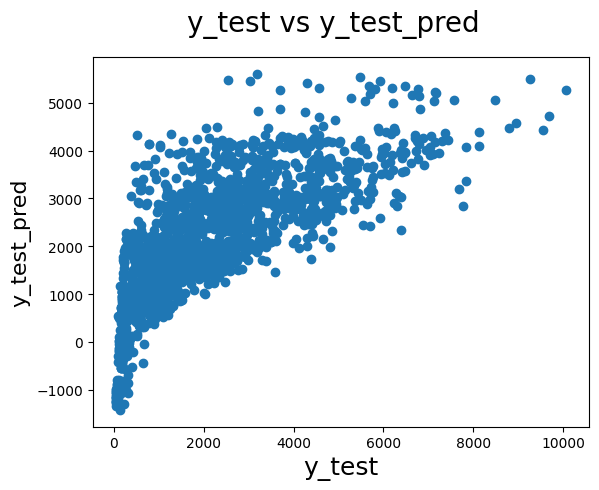

In [67]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

In [68]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Dictionary to store results
results = {}

# Function to evaluate and store model results
def evaluate_model(name, model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'R2': r2, 'RMSE': rmse, 'MAE': mae}
    print(f"\n{name} Results:")
    print(f"R2 Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    return model

# 1. Ridge Regression
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2', n_jobs=-1)
evaluate_model("Ridge Regression", ridge, x_train, y_train, x_test, y_test)

# 2. Lasso Regression
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
lasso = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='r2', n_jobs=-1)
evaluate_model("Lasso Regression", lasso, x_train, y_train, x_test, y_test)

# 3. Decision Tree
dt_params = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
dt = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring='r2', n_jobs=-1)
evaluate_model("Decision Tree", dt, x_train, y_train, x_test, y_test)

# 4. Random Forest
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}
rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='r2', n_jobs=-1)
evaluate_model("Random Forest", rf, x_train, y_train, x_test, y_test)

# 5. Gradient Boosting
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gb = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_params, cv=5, scoring='r2', n_jobs=-1)
evaluate_model("Gradient Boosting", gb, x_train, y_train, x_test, y_test)

# 6. XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}
xgb = GridSearchCV(XGBRegressor(random_state=42, objective='reg:squarederror'), xgb_params, cv=5, scoring='r2', n_jobs=-1)
evaluate_model("XGBoost", xgb, x_train, y_train, x_test, y_test)

# Display all results
print("\n--- Model Comparison Summary ---")
for model_name, metrics in results.items():
    print(f"{model_name}: R2={metrics['R2']:.4f}, RMSE={metrics['RMSE']:.2f}, MAE={metrics['MAE']:.2f}")



Ridge Regression Results:
R2 Score: 0.5485
RMSE: 1154.1080
MAE: 859.1145

Lasso Regression Results:
R2 Score: 0.5480
RMSE: 1154.7314
MAE: 858.5226

Decision Tree Results:
R2 Score: 0.5579
RMSE: 1142.0748
MAE: 797.6854

Random Forest Results:
R2 Score: 0.5862
RMSE: 1104.9078
MAE: 781.4549

Gradient Boosting Results:
R2 Score: 0.5855
RMSE: 1105.9029
MAE: 785.2305

XGBoost Results:
R2 Score: 0.5858
RMSE: 1105.5008
MAE: 784.3714

--- Model Comparison Summary ---
Ridge Regression: R2=0.5485, RMSE=1154.11, MAE=859.11
Lasso Regression: R2=0.5480, RMSE=1154.73, MAE=858.52
Decision Tree: R2=0.5579, RMSE=1142.07, MAE=797.69
Random Forest: R2=0.5862, RMSE=1104.91, MAE=781.45
Gradient Boosting: R2=0.5855, RMSE=1105.90, MAE=785.23
XGBoost: R2=0.5858, RMSE=1105.50, MAE=784.37


In [69]:
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train, y_train)
y_pred = random_search.predict(x_test)

# Evaluate
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Best Parameters:", random_search.best_params_)
print("R² Score:", r2)
print("RMSE:", rmse)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
R² Score: 0.5841760484458373
RMSE: 1107.6164579915894


In [70]:
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error

lgb = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.6,
    random_state=42
)

lgb.fit(x_train, y_train)
y_pred_lgb = lgb.predict(x_test)

print("LGBM R2 Score:", r2_score(y_test, y_pred_lgb))
print("LGBM RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lgb)))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 818
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 27
[LightGBM] [Info] Start training from score 2172.620631
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [71]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from xgboost import XGBRegressor

estimators = [
    ('rf', RandomForestRegressor(n_estimators=200, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=200, random_state=42)),
    ('xgb', XGBRegressor(**random_search.best_params_, random_state=42))
]

stack_model = StackingRegressor(estimators=estimators, final_estimator=Ridge())
stack_model.fit(x_train, y_train)
y_pred_stack = stack_model.predict(x_test)

print("Stacked Model R2 Score:", r2_score(y_test, y_pred_stack))
print("Stacked Model RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_stack)))


Stacked Model R2 Score: 0.5867472277785031
Stacked Model RMSE: 1104.1867655113103


In [72]:
from sklearn.svm import SVR

# 7. SVR (RBF Kernel)
svr_params = {
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto']
}
svr = GridSearchCV(SVR(kernel='rbf'), svr_params, cv=5, scoring='r2', n_jobs=-1)
evaluate_model("SVR (RBF)", svr, x_train, y_train, x_test, y_test)



SVR (RBF) Results:
R2 Score: 0.3135
RMSE: 1423.1448
MAE: 1044.2950


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'epsilon': [0.1, 0.2, 0.5],
                         'gamma': ['scale', 'auto']},
             scoring='r2')

In [73]:
from sklearn.neural_network import MLPRegressor

# 8. Neural Network
mlp_params = {
    'hidden_layer_sizes': [(100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [500]
}
mlp = GridSearchCV(MLPRegressor(random_state=42), mlp_params, cv=5, scoring='r2', n_jobs=-1)
evaluate_model("Neural Network (MLP)", mlp, x_train, y_train, x_test, y_test)



Neural Network (MLP) Results:
R2 Score: 0.5810
RMSE: 1111.8340
MAE: 788.7735


GridSearchCV(cv=5, estimator=MLPRegressor(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(100,), (50, 50)],
                         'learning_rate_init': [0.001, 0.01],
                         'max_iter': [500]},
             scoring='r2')

In [74]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
# 7. K-Nearest Neighbors (KNN)
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
knn = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring='r2', n_jobs=-1)
evaluate_model("KNN Regressor", knn, x_train, y_train, x_test, y_test)



KNN Regressor Results:
R2 Score: 0.4311
RMSE: 1295.5944
MAE: 944.6136


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [75]:
# 8. AdaBoost
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}
ada = GridSearchCV(AdaBoostRegressor(random_state=42), ada_params, cv=5, scoring='r2', n_jobs=-1)
evaluate_model("AdaBoost Regressor", ada, x_train, y_train, x_test, y_test)



AdaBoost Regressor Results:
R2 Score: 0.4822
RMSE: 1236.0318
MAE: 934.0419


GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [76]:
from sklearn.svm import SVR

# 9. Support Vector Regression
svr_params = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5]
}
svr = GridSearchCV(SVR(), svr_params, cv=5, scoring='r2', n_jobs=-1)
evaluate_model("Support Vector Regressor", svr, x_train, y_train, x_test, y_test)



Support Vector Regressor Results:
R2 Score: 0.5056
RMSE: 1207.7237
MAE: 872.7020


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.5],
                         'kernel': ['rbf', 'linear']},
             scoring='r2')

In [77]:
from sklearn.ensemble import ExtraTreesRegressor

# 10. Extra Trees
et_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
et = GridSearchCV(ExtraTreesRegressor(random_state=42), et_params, cv=5, scoring='r2', n_jobs=-1)
evaluate_model("Extra Trees Regressor", et, x_train, y_train, x_test, y_test)



Extra Trees Regressor Results:
R2 Score: 0.5805
RMSE: 1112.5322
MAE: 784.1721


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [78]:
from sklearn.ensemble import BaggingRegressor

# 13. Bagging
bagging_params = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0]
}
bagging = GridSearchCV(BaggingRegressor(random_state=42), bagging_params, cv=5, scoring='r2', n_jobs=-1)
evaluate_model("Bagging Regressor", bagging, x_train, y_train, x_test, y_test)



Bagging Regressor Results:
R2 Score: 0.5687
RMSE: 1128.0334
MAE: 799.9683


GridSearchCV(cv=5, estimator=BaggingRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_samples': [0.5, 1.0],
                         'n_estimators': [10, 50, 100]},
             scoring='r2')

In [79]:
from sklearn.linear_model import PassiveAggressiveRegressor

# 14. Passive-Aggressive
pa_params = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'epsilon': [0.01, 0.1, 1.0]
}
pa = GridSearchCV(PassiveAggressiveRegressor(max_iter=1000, random_state=42), pa_params, cv=5, scoring='r2', n_jobs=-1)
evaluate_model("Passive-Aggressive Regressor", pa, x_train, y_train, x_test, y_test)



Passive-Aggressive Regressor Results:
R2 Score: 0.1978
RMSE: 1538.3866
MAE: 1170.3218


GridSearchCV(cv=5, estimator=PassiveAggressiveRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10.0],
                         'epsilon': [0.01, 0.1, 1.0]},
             scoring='r2')

In [80]:
from sklearn.linear_model import TweedieRegressor

# 15. Tweedie Regressor
tweedie_params = {
    'power': [0, 1, 1.5],
    'alpha': [0.1, 1.0, 10.0]
}
tweedie = GridSearchCV(TweedieRegressor(max_iter=1000), tweedie_params, cv=5, scoring='r2', n_jobs=-1)
evaluate_model("Tweedie Regressor", tweedie, x_train, y_train, x_test, y_test)



Tweedie Regressor Results:
R2 Score: 0.5591
RMSE: 1140.4838
MAE: 804.0469


GridSearchCV(cv=5, estimator=TweedieRegressor(max_iter=1000), n_jobs=-1,
             param_grid={'alpha': [0.1, 1.0, 10.0], 'power': [0, 1, 1.5]},
             scoring='r2')